<a href="https://colab.research.google.com/github/Kajalnsingh/Mnist_ML_DL_Project/blob/main/MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
# load MNIST data
data = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
# combine training and testing data for EDA
x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
x.shape, y.shape

((70000, 28, 28), (70000,))

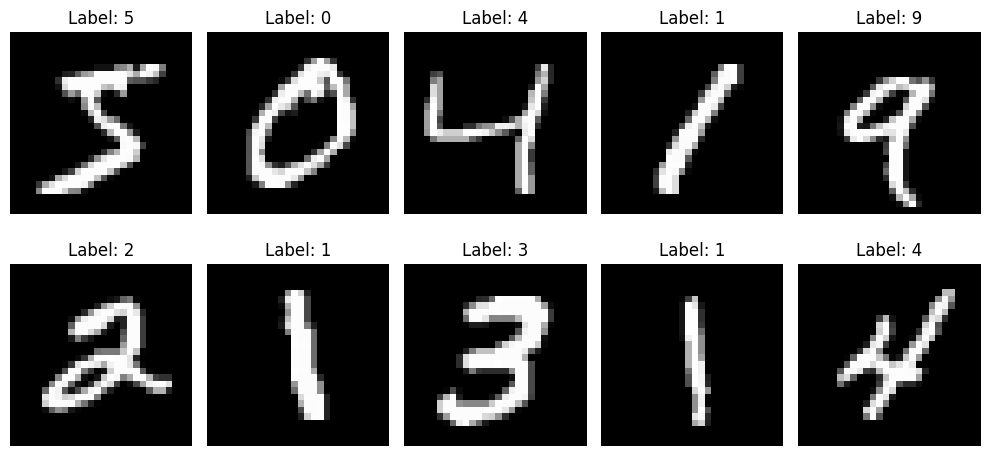

In [ ]:
#Let's visualize sample images
# plot sample images
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x[i], cmap = 'gray')
  plt.title(f"Label: {y[i]}")
  plt.axis('Off')
plt.tight_layout()
plt.show()

<ipython-input-7-aa585b00f246>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Digit', y='Count', data = class_distribution, palette = 'viridis')


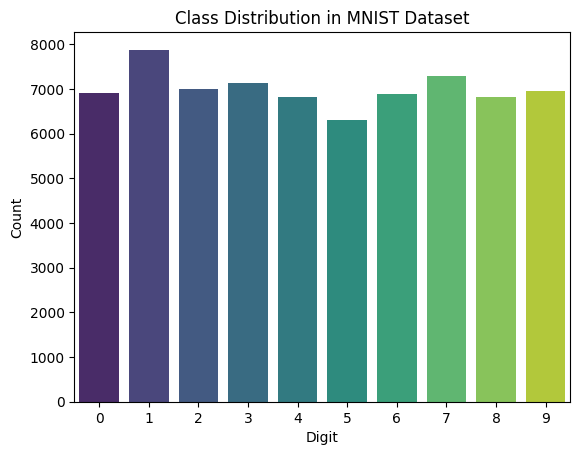

In [ ]:
# check class distribution

# count the occurance of each class
unique,counts = np.unique(y, return_counts=True)
class_distribution = pd.DataFrame({'Digit': unique, 'Count': counts})

sns.barplot(x='Digit', y='Count', data = class_distribution, palette = 'viridis')
plt.title('Class Distribution in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

In [ ]:
# visualize Pixel Intensity Distribution
#Flatten staistics for pixel intensities
mean_intensity = np.mean(x)
std_intensity = np.std(x)
max_intensity = np.max(x)
min_intensity = np.min(x)

print(f"mean_intensity: {mean_intensity}")
print(f"std_intensity: {std_intensity}")
print(f"max_intensity: {max_intensity}")
print(f"min_intensity: {min_intensity}")

mean_intensity: 33.385964741253645
std_intensity: 78.6543736268941
max_intensity: 255
min_intensity: 0


In [ ]:
# checking missing values
print(np.isnan(x).sum())
print(np.isnan(y).sum())

0
0


#Preprocessing

In [ ]:
#Reshape for machine learning models
#1st as 1D array
x_flat = x.reshape(x.shape[0], -1)

#Reshape for deep learning models(add channel dimension)
#As 4D
x_dl =x.reshape(x.shape[0], 28,28,1)

print("Shape for ML models:", x_flat.shape)
print("Shape for ML models:", x_dl.shape)

Shape for ML models: (70000, 784)
Shape for ML models: (70000, 28, 28, 1)


In [ ]:
#Normalize the data
x_flat = x_flat/255
x_dl = x_dl/255

In [ ]:
#Now Let's split the dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_flat, y, test_size= 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (56000, 784) (56000,)
Test set shape: (14000, 784) (14000,)


#ML Algorithms

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter =1000, random_state=42)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# predict on the test set
y_pred = lr_model.predict(x_test)

In [ ]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

Accuracy 0.9204285714285714

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



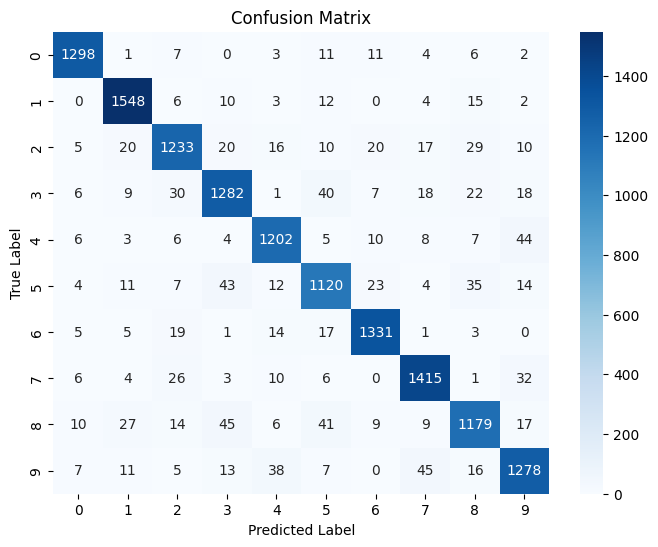

In [ ]:
# visualize confusion matrix
import seaborn as sns
con_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Better aspect ratio
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#Decision Tree

In [ ]:
#import library
from sklearn.tree import DecisionTreeClassifier
#Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = dt_model.predict(x_test)

In [ ]:
#Evaluate on the test set
y_pred_dt = dt_model.predict(x_test)

In [ ]:
#Evaluate the model
print("Accuracy", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report\n", classification_report(y_test, y_pred_dt))

Accuracy 0.8695714285714286

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



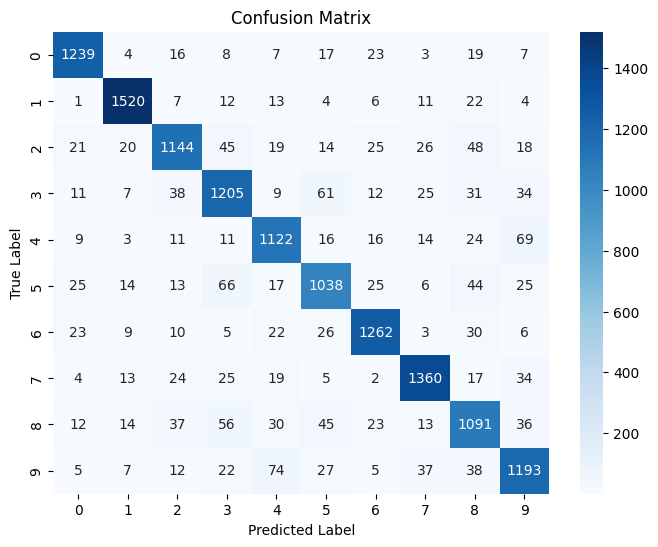

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))  # Better aspect ratio
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Train the Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state = 42, n_jobs = 1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [ ]:
#Predict on the test set
y_pred_rf = rf_model.predict(x_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report\n", classification_report(y_test, y_pred_rf))

Accuracy Score 0.9680714285714286

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



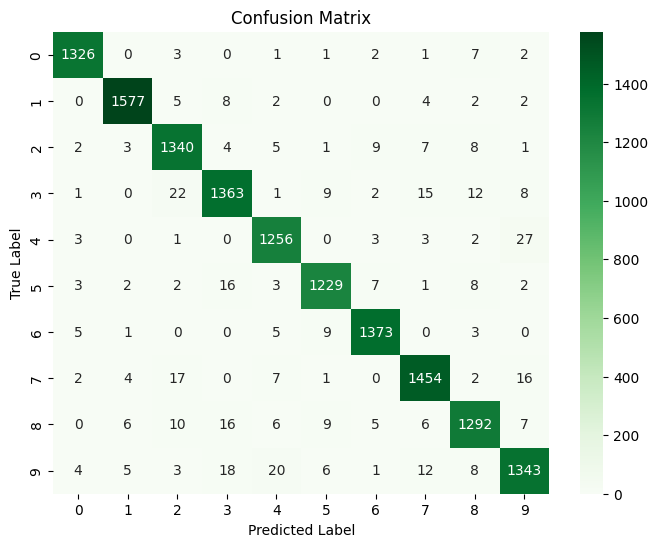

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))  # Better aspect ratio
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Simple Neural Network

In [ ]:
#Import Neural Network Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [ ]:
# Build the model
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(784,)),  # assuming input is flattened 28x28 image
    Dropout(0.2),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7771 - loss: 0.8092 - val_accuracy: 0.9208 - val_loss: 0.2713
Epoch 2/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9186 - loss: 0.2801 - val_accuracy: 0.9384 - val_loss: 0.2054
Epoch 3/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9377 - loss: 0.2130 - val_accuracy: 0.9483 - val_loss: 0.1686
Epoch 4/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9520 - loss: 0.1647 - val_accuracy: 0.9576 - val_loss: 0.1446
Epoch 5/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9581 - loss: 0.1397 - val_accuracy: 0.9613 - val_loss: 0.1290
Epoch 6/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9650 - loss: 0.1204 - val_accuracy: 0.9642 - val_loss: 0.1183
Epoch 7/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9689 - loss: 0.1075 - val_accuracy: 0.9682 - val_loss: 0.1072
Epoch 8/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9717 - loss: 0.095

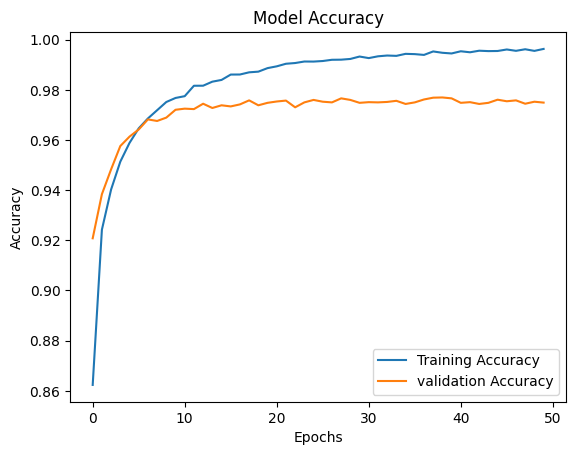

In [ ]:
#PLot training and validation accuracy
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()

In [ ]:
#Predict on a few test sapmles
predictions = model.predict(x_test[:10])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[5.49150840e-08, 2.10564144e-06, 6.51328117e-02, 8.62774312e-01,
        2.34734762e-06, 2.12179162e-02, 2.41205633e-08, 7.51115203e-06,
        9.99998212e-01, 6.06254255e-03],
       [1.51927110e-10, 4.44963261e-10, 3.83027610e-09, 6.54514355e-04,
        9.99997377e-01, 3.46994566e-05, 6.91562307e-10, 3.34173590e-01,
        8.27401163e-06, 2.62278616e-01],
       [1.02331280e-04, 1.49245193e-06, 1.05715897e-02, 3.24839354e-02,
        3.67081782e-04, 3.13466847e-01, 1.20060649e-02, 5.55478546e-05,
        9.96600091e-01, 3.60021025e-01],
       [1.08452502e-06, 4.56882844e-05, 7.66403973e-01, 8.94480646e-01,
        1.55694374e-10, 1.41180621e-07, 1.71902643e-14, 9.99985993e-01,
        3.94676078e-07, 5.25568612e-05],
       [6.99432974e-04, 9.86883650e-04, 1.85012861e-04, 2.89609306e-03,
        8.03942967e-05, 9.51240418e-06, 2.03746110e-15, 9.99921381e-01,
        1.48139102e-03, 9.45273459e-01],
       [9.99471247e-01, 2.55458016e-10, 8.81509244e-01, 2.94942474e-05,
   

#CNN


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#Build the Model
cnn_model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation= 'relu'),
    Dropout(0.5),
    Dense(128, activation= 'softmax')
])

cnn_model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,608 (502.38 KB)

 Trainable params: 128,608 (502.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(x_dl,y, validation_split=0.2, epochs = 10, batch_size=64)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.7429 - loss: 0.9451 - val_accuracy: 0.9808 - val_loss: 0.0637
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.9665 - loss: 0.1129 - val_accuracy: 0.9860 - val_loss: 0.0438
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9764 - loss: 0.0798 - val_accuracy: 0.9881 - val_loss: 0.0367
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.9813 - loss: 0.0633 - val_accuracy: 0.9899 - val_loss: 0.0320
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9833 - loss: 0.0550 - val_accuracy: 0.9906 - val_loss: 0.0309
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9863 - loss: 0.0483 - val_accuracy: 0.9916 - val_loss: 0.0281
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9863 - loss: 0.0432 - val_accuracy: 0.9921 - val_loss: 0.0250
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.9881 - loss: 0.0383 - 

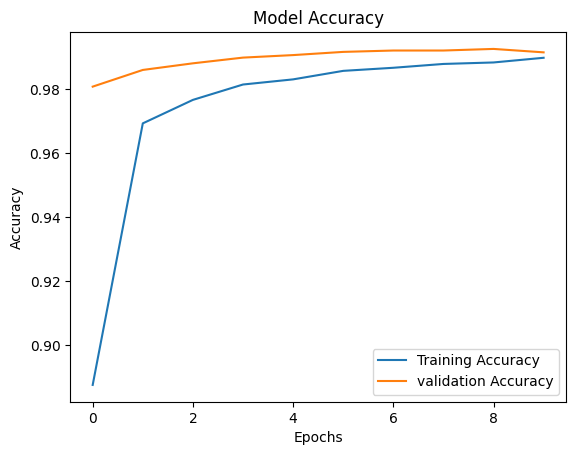

In [ ]:
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()

In [ ]:
#Predict on a few test sapmles
predictions = model.predict(x_test[:10])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[5.49150840e-08, 2.10564144e-06, 6.51328117e-02, 8.62774312e-01,
        2.34734762e-06, 2.12179162e-02, 2.41205633e-08, 7.51115203e-06,
        9.99998212e-01, 6.06254255e-03],
       [1.51927110e-10, 4.44963261e-10, 3.83027610e-09, 6.54514355e-04,
        9.99997377e-01, 3.46994566e-05, 6.91562307e-10, 3.34173590e-01,
        8.27401163e-06, 2.62278616e-01],
       [1.02331280e-04, 1.49245193e-06, 1.05715897e-02, 3.24839354e-02,
        3.67081782e-04, 3.13466847e-01, 1.20060649e-02, 5.55478546e-05,
        9.96600091e-01, 3.60021025e-01],
       [1.08452502e-06, 4.56882844e-05, 7.66403973e-01, 8.94480646e-01,
        1.55694374e-10, 1.41180621e-07, 1.71902643e-14, 9.99985993e-01,
        3.94676078e-07, 5.25568612e-05],
       [6.99432974e-04, 9.86883650e-04, 1.85012861e-04, 2.89609306e-03,
        8.03942967e-05, 9.51240418e-06, 2.03746110e-15, 9.99921381e-01,
        1.48139102e-03, 9.45273459e-01],
       [9.99471247e-01, 2.55458016e-10, 8.81509244e-01, 2.94942474e-05,
   